In [23]:
data_source = "https://andybek.com/pandas-drinks"

In [24]:
# import pandas
import pandas as pd

In [25]:
# read data
original_data = pd.read_csv(data_source)
original_data.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


In [26]:
# create series
bear = pd.read_csv(data_source, usecols=['beer_servings', 'country'], index_col='country').squeeze()
bear.head(5)

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
Name: beer_servings, dtype: float64

In [27]:
# check nulls
bear.hasnans

True

In [33]:
# total rows
bear.size

193

In [29]:
# count nulls
bear.isnull().sum()

15

In [34]:
193-15

178

In [37]:
# remove nulls
bear.dropna(inplace=True)

In [38]:
bear.size

178

In [39]:
bear.hasnans

False

In [43]:
# mean/average
round(bear.mean(), 2)

102.87

In [44]:
# median
bear.median()

60.0

In [47]:
# standard deviation
round(bear.std(), 2)

100.65

<Axes: >

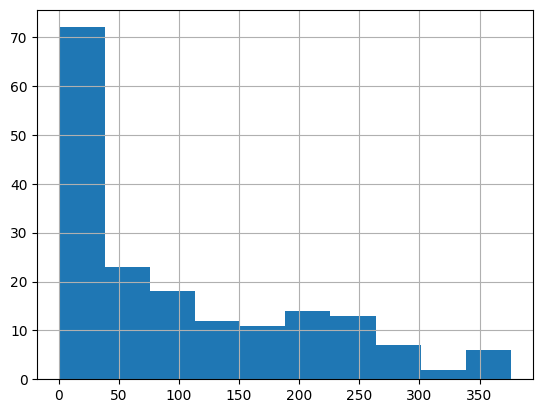

In [48]:
# distribution
bear.hist()

In [51]:
# first 10 countries
first_10 = bear[:10]
first_10

country
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Azerbaijan            21.0
Name: beer_servings, dtype: float64

In [57]:
# compare first 10 country with sample data
first_10 - bear.mean()

country
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Azerbaijan           -81.870787
Name: beer_servings, dtype: float64

In [60]:
# visual 
compare = (first_10 - bear.mean()).apply(lambda x: 'low' if x < bear.mean() else 'high').sort_values()
compare

country
Andorra              high
Angola               high
Australia            high
Austria              high
Albania               low
Algeria               low
Antigua & Barbuda     low
Argentina             low
Armenia               low
Azerbaijan            low
Name: beer_servings, dtype: object

In [61]:
compare.value_counts()

beer_servings
low     6
high    4
Name: count, dtype: int64

In [64]:
# z-scores
[(i - bear.mean())/bear.std() for i in first_10]

[-0.13781795714483694,
 -0.7737119092687669,
 1.4121735511572426,
 1.1339699471030231,
 -0.9028778682939402,
 0.8955097150565493,
 -0.8134552812765126,
 1.571147039188225,
 1.7499922132230803,
 -0.8134552812765126]

In [66]:
# for all data find the z-score
z = (bear - bear.mean())/bear.std()
z.head(10)

country
Albania             -0.137818
Algeria             -0.773712
Andorra              1.412174
Angola               1.133970
Antigua & Barbuda   -0.902878
Argentina            0.895510
Armenia             -0.813455
Australia            1.571147
Austria              1.749992
Azerbaijan          -0.813455
Name: beer_servings, dtype: float64

In [67]:
# largest z-score
z.max()

2.713768984410912

In [69]:
z.abs().max()

2.713768984410912

In [71]:
z.idxmax()

'Namibia'

In [73]:
bear[bear.idxmax()]

376.0